In [1]:
pwd

'C:\\Users\\91870'

In [2]:
cd c:\\Users\\91870\Desktop\fashion_mnist

c:\Users\91870\Desktop\fashion_mnist


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')

In [5]:
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep=',')

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape

(60000, 785)

In [9]:
fashion_test_df.shape

(10000, 785)

In [10]:
fashion_train_df.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [11]:
training = np.array(fashion_train_df,dtype='float32')

In [12]:
testing = np.array(fashion_test_df,dtype='float32')

3.0

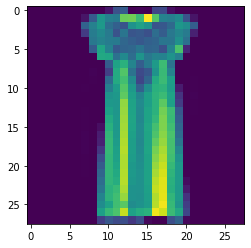

In [13]:
import random
i= random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label=training[i,0]
label

In [14]:
#remember 10 classes is decoded as follows:
# 0 = Tshirt/topp
# 1 = Trouser
# 2 = Pullover
# 3 = dress
# 4 = coat
# 5 = sandal
# 6 = shirt
# 7 = sneaker
# 8 = bag
# 9 = Ankle boot

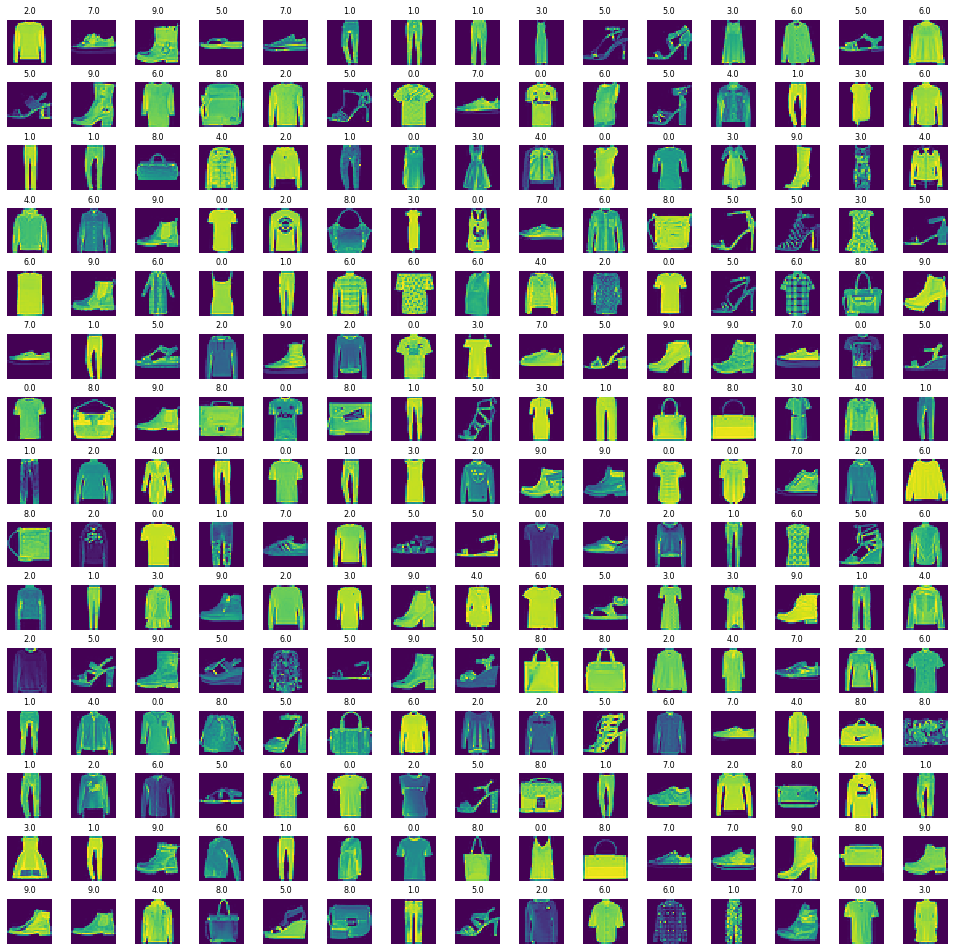

In [15]:
w_grid =15
L_grid =15

fig,axes= plt.subplots(L_grid,w_grid,figsize=(17,17))
axes = axes.ravel()

n_training =len(training)

for i in np.arange(0,w_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [16]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=2)

X_train =X_train.reshape(X_train.shape[0],*(28,28,1))
X_test =X_test.reshape(X_test.shape[0],*(28,28,1))

X_validate =X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))

In [19]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())

In [20]:
cnn_model.add(Dense(units=32,activation='relu'))
cnn_model.add(Dense(units=10,activation='sigmoid'))


In [21]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics='accuracy')

In [22]:

cnn_model.fit(X_train,y_train,batch_size=512,epochs=50,verbose=1,validation_data=(X_validate,y_validate))

Epoch 1/50
94/94 [==============================] - 3s 27ms/step - loss: 1.5925 - accuracy: 0.5435 - val_loss: 0.8088 - val_accuracy: 0.7115
Epoch 2/50
94/94 [==============================] - 2s 22ms/step - loss: 0.7229 - accuracy: 0.7364 - val_loss: 0.6504 - val_accuracy: 0.7660
Epoch 3/50
94/94 [==============================] - 2s 23ms/step - loss: 0.6212 - accuracy: 0.7726 - val_loss: 0.5925 - val_accuracy: 0.7824
Epoch 4/50
94/94 [==============================] - 2s 22ms/step - loss: 0.5684 - accuracy: 0.7906 - val_loss: 0.5483 - val_accuracy: 0.8033
Epoch 5/50
94/94 [==============================] - 2s 22ms/step - loss: 0.5351 - accuracy: 0.8049 - val_loss: 0.5225 - val_accuracy: 0.8102
Epoch 6/50
94/94 [==============================] - 2s 22ms/step - loss: 0.5079 - accuracy: 0.8142 - val_loss: 0.4998 - val_accuracy: 0.8213
Epoch 7/50
94/94 [==============================] - 2s 23ms/step - loss: 0.4890 - accuracy: 0.8217 - val_loss: 0.4848 - val_accuracy: 0.8257
Epoch 8/50
94

## Evaluating The Model:

In [23]:
evaluation=cnn_model.evaluate(X_test,y_test)
print("Test_Accuracy {:,.3f}".format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3595 - accuracy: 0.8687
Test_Accuracy 0.869


In [24]:
predicted_classes = cnn_model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


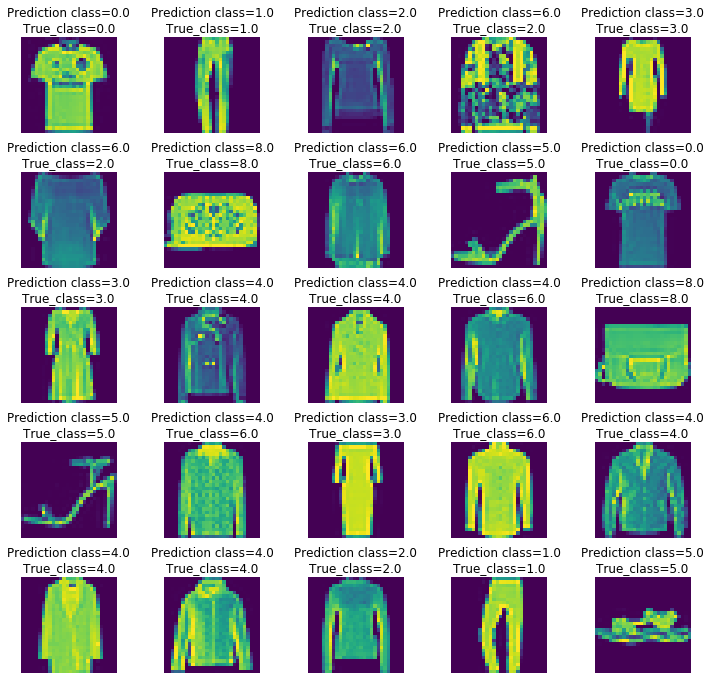

In [25]:
L =5
W =5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction class={:.1f}\nTrue_class={:0.1f}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [26]:
#remember 10 classes is decoded as follows:
# 0 = Tshirt/topp
# 1 = Trouser
# 2 = Pullover
# 3 = dress
# 4 = coat
# 5 = sandal
# 6 = shirt
# 7 = sneaker
# 8 = bag
# 9 = Ankle boot

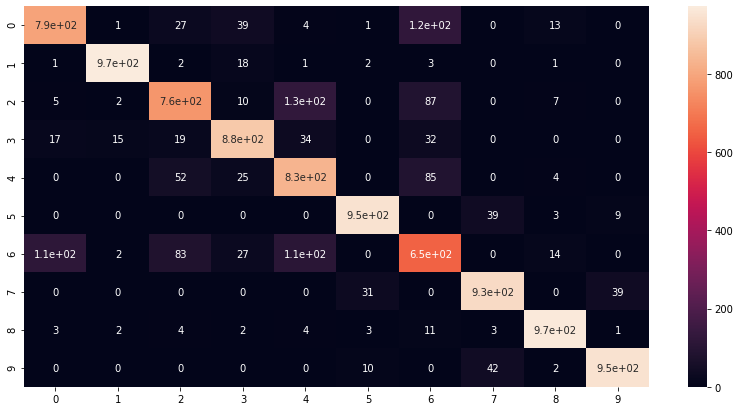

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)

In [28]:
num_classes=10
target_names=["Class{}".format(i) for i in range(num_classes)]
print(classification_report(y_test,predicted_classes,target_names=target_names ))

              precision    recall  f1-score   support

      Class0       0.85      0.79      0.82      1000
      Class1       0.98      0.97      0.97      1000
      Class2       0.80      0.76      0.78      1000
      Class3       0.88      0.88      0.88      1000
      Class4       0.75      0.83      0.79      1000
      Class5       0.95      0.95      0.95      1000
      Class6       0.66      0.65      0.65      1000
      Class7       0.92      0.93      0.92      1000
      Class8       0.96      0.97      0.96      1000
      Class9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

